In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import cv2 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x "/content/drive/My Drive/Colab Notebooks/flowers.rar" "/content/drive/My Drive/Colab Notebooks"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Colab Notebooks/flowers.rar

Creating    /content/drive/My Drive/Colab Notebooks/flowers           OK
Creating    /content/drive/My Drive/Colab Notebooks/flowers/daisy     OK
Extracting  /content/drive/My Drive/Colab Notebooks/flowers/daisy/100080576_f52e8ee070_n.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/flowers/daisy/10140303196_b88d3d6cec.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/flowers/daisy/10172379554_b296050f82_n.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/flowers/daisy/10172567486_2748826a8b.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/flowers/daisy/10172636503_21bededa75_n.jpg       0%  OK 
Extracting  /content/drive/My Drive/Colab Notebooks/flowers/daisy/102841525_bd6628ae3c.jpg       0%  OK 
Extracting  /conte

In [5]:
import os
print(os.listdir("/content/drive/My Drive/Colab Notebooks/flowers"))

['dandelion', 'rose', 'sunflower', 'tulip', 'daisy']


In [6]:
daisy_path = "/content/drive/My Drive/Colab Notebooks/flowers/daisy/"

tulip_path = "/content/drive/My Drive/Colab Notebooks/flowers/tulip/" 

rose_path = "/content/drive/My Drive/Colab Notebooks/flowers/rose/" 

In [17]:
trainLabels = [] 
data = [] 

size = 320,240

def readImages(flowerPath, folder):
    
    imagePaths = []
    for file in os.listdir(flowerPath):
        if file.endswith("jpg"): 
            imagePaths.append(flowerPath + file)
            trainLabels.append(folder)
            img = cv2.imread((flowerPath + file), 0)
            im = cv2.resize(img, size)
            data.append(im)            
            
    return imagePaths

In [21]:
def showImage(imgPath):
    img = cv2.imread(imgPath)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap = 'gray', interpolation = 'bicubic')
    plt.axis('off')
    plt.show()

In [19]:
daisyPaths = readImages(daisy_path, 'daisy')
tulipPaths = readImages(tulip_path, 'tulip')
rosePaths = readImages(rose_path, 'rose')

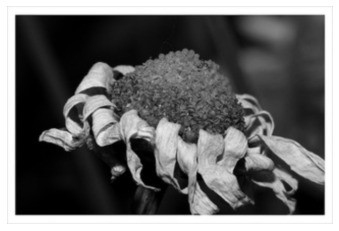

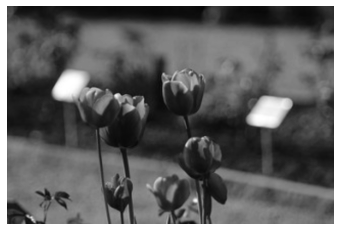

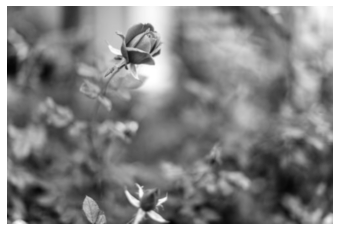

In [22]:
showImage(daisyPaths[np.random.randint(0,500)])
showImage(tulipPaths[np.random.randint(0,500)])
showImage(rosePaths[np.random.randint(0,500)])

In [23]:
rawData = np.array(data)
rawData.shape

(2537, 240, 320)

In [24]:
rawData = rawData.astype('float32') / 255.0

In [25]:
X = rawData
z = np.zeros(1269)
o = np.ones(1268)
Y = np.concatenate((z, o), axis = 0).reshape(X.shape[0], 1)

print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (2537, 240, 320)
Y shape:  (2537, 1)


In [26]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
numberOfTrain = xTrain.shape[0]
numberOfTest = xTest.shape[0]

In [27]:
xTrainFlatten = xTrain.reshape(numberOfTrain, xTrain.shape[1] * xTrain.shape[2])
xTestFlatten = xTest.reshape(numberOfTest, xTest.shape[1] * xTest.shape[2])

print("X train flatten", xTrainFlatten.shape)
print("X test flatten", xTestFlatten.shape)

X train flatten (2029, 76800)
X test flatten (508, 76800)


In [28]:
x_train = xTrainFlatten.T
x_test = xTestFlatten.T
y_train = yTrain.T
y_test = yTest.T
print("x train: ",xTrain.shape)
print("x test: ",xTest.shape)
print("y train: ",yTrain.shape)
print("y test: ",yTest.shape)

x train:  (2029, 240, 320)
x test:  (508, 240, 320)
y train:  (2029, 1)
y test:  (508, 1)


In [29]:
def initializeParametersAndLayerSizesNN(x_train, y_train):
    
    parameters = {"weight1": np.random.randn(3, x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3, 1)),
                  "weight2": np.random.randn(y_train.shape[0], 3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0], 1))}
    
    return parameters

In [30]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [35]:
def forwardPropagation(x_train, parameters):

    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [36]:
def errorFunction(A2, Y, parameters):
    
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    
    return error

In [37]:
def backwardPropagation(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    
    return grads

In [38]:
def updateParameter(parameters, grads, learning_rate):
    
    parameters = {"weight1": parameters["weight1"] - learning_rate * grads["dweight1"],
                  "bias1": parameters["bias1"] - learning_rate * grads["dbias1"],
                  "weight2": parameters["weight2"] - learning_rate * grads["dweight2"],
                  "bias2": parameters["bias2"] - learning_rate * grads["dbias2"]}
    
    return parameters

In [39]:
def predict(parameters, x_test):

    A2, cache = forwardPropagationNN(x_test, parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(A2.shape[1]):
        if A2[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

Error per iteration 0: 0.360758
Error per iteration 10: 0.349767
Error per iteration 20: 0.346828
Error per iteration 30: 0.344951
Error per iteration 40: 0.343194


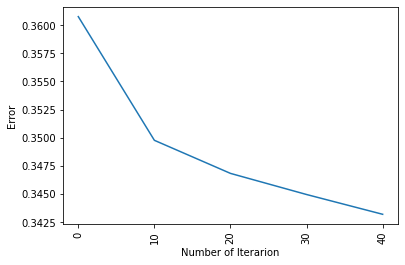

train accuracy: 53.72104484967964 %
test accuracy: 50.39370078740157 %


In [43]:
def neural_network(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    
    error_list = []
    index_list = []
    
    # Initialize parameters
    parameters = initializeParametersAndLayerSizesNN(x_train, y_train)

    for i in range(0, num_iterations):
        # Forward propagation
        A2, cache = forwardPropagation(x_train, parameters)
        # Calculation of cost value
        error = errorFunction(A2, y_train, parameters)
         # Backward propagation
        grads = backwardPropagation(parameters, cache, x_train, y_train)
         # Updating parameters
        parameters = updateParameter(parameters, grads, learning_rate)
        
        if i % 10 == 0:
            error_list.append(error)
            index_list.append(i)
            print ("Error per iteration %i: %f" %(i, error))
            
    plt.plot(index_list,error_list)
    plt.xticks(index_list,rotation = 'vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Error")
    plt.show()
    
    # Prediction
    y_prediction_test = predict(parameters, x_test)
    y_prediction_train = predict(parameters, x_train)

    # Print results
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = neural_network(x_train, y_train, x_test, y_test, learning_rate = 0.1, num_iterations = 50)

Error per iteration 0: 0.300942
Error per iteration 10: 0.348720
Error per iteration 20: 0.323631
Error per iteration 30: 0.308718
Error per iteration 40: 0.311603


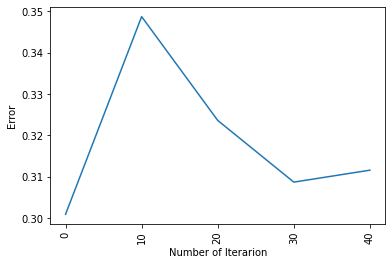

train accuracy: 57.66387382947264 %
test accuracy: 53.54330708661417 %


In [45]:
parameters = neural_network(x_train, y_train, x_test, y_test, learning_rate = 0.8, num_iterations = 50)